In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 12 19:59:10 2020

@author: Parviz.Asoodehfard
"""
import sys
sys.path.append('../src/')

import importlib
import pandas as pd
from module import gafs
from sklearn.linear_model import LogisticRegression

%matplotlib notebook


X = pd.read_csv(r'../data/x_breast_cancer.csv',index_col=0)
y = pd.read_csv(r'../data/y_breast_cancer.csv',index_col=0,header=None)
y = y[1].apply(lambda x:1 if x=='B' else 0)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
X.shape

(569, 30)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      

generation size:  60


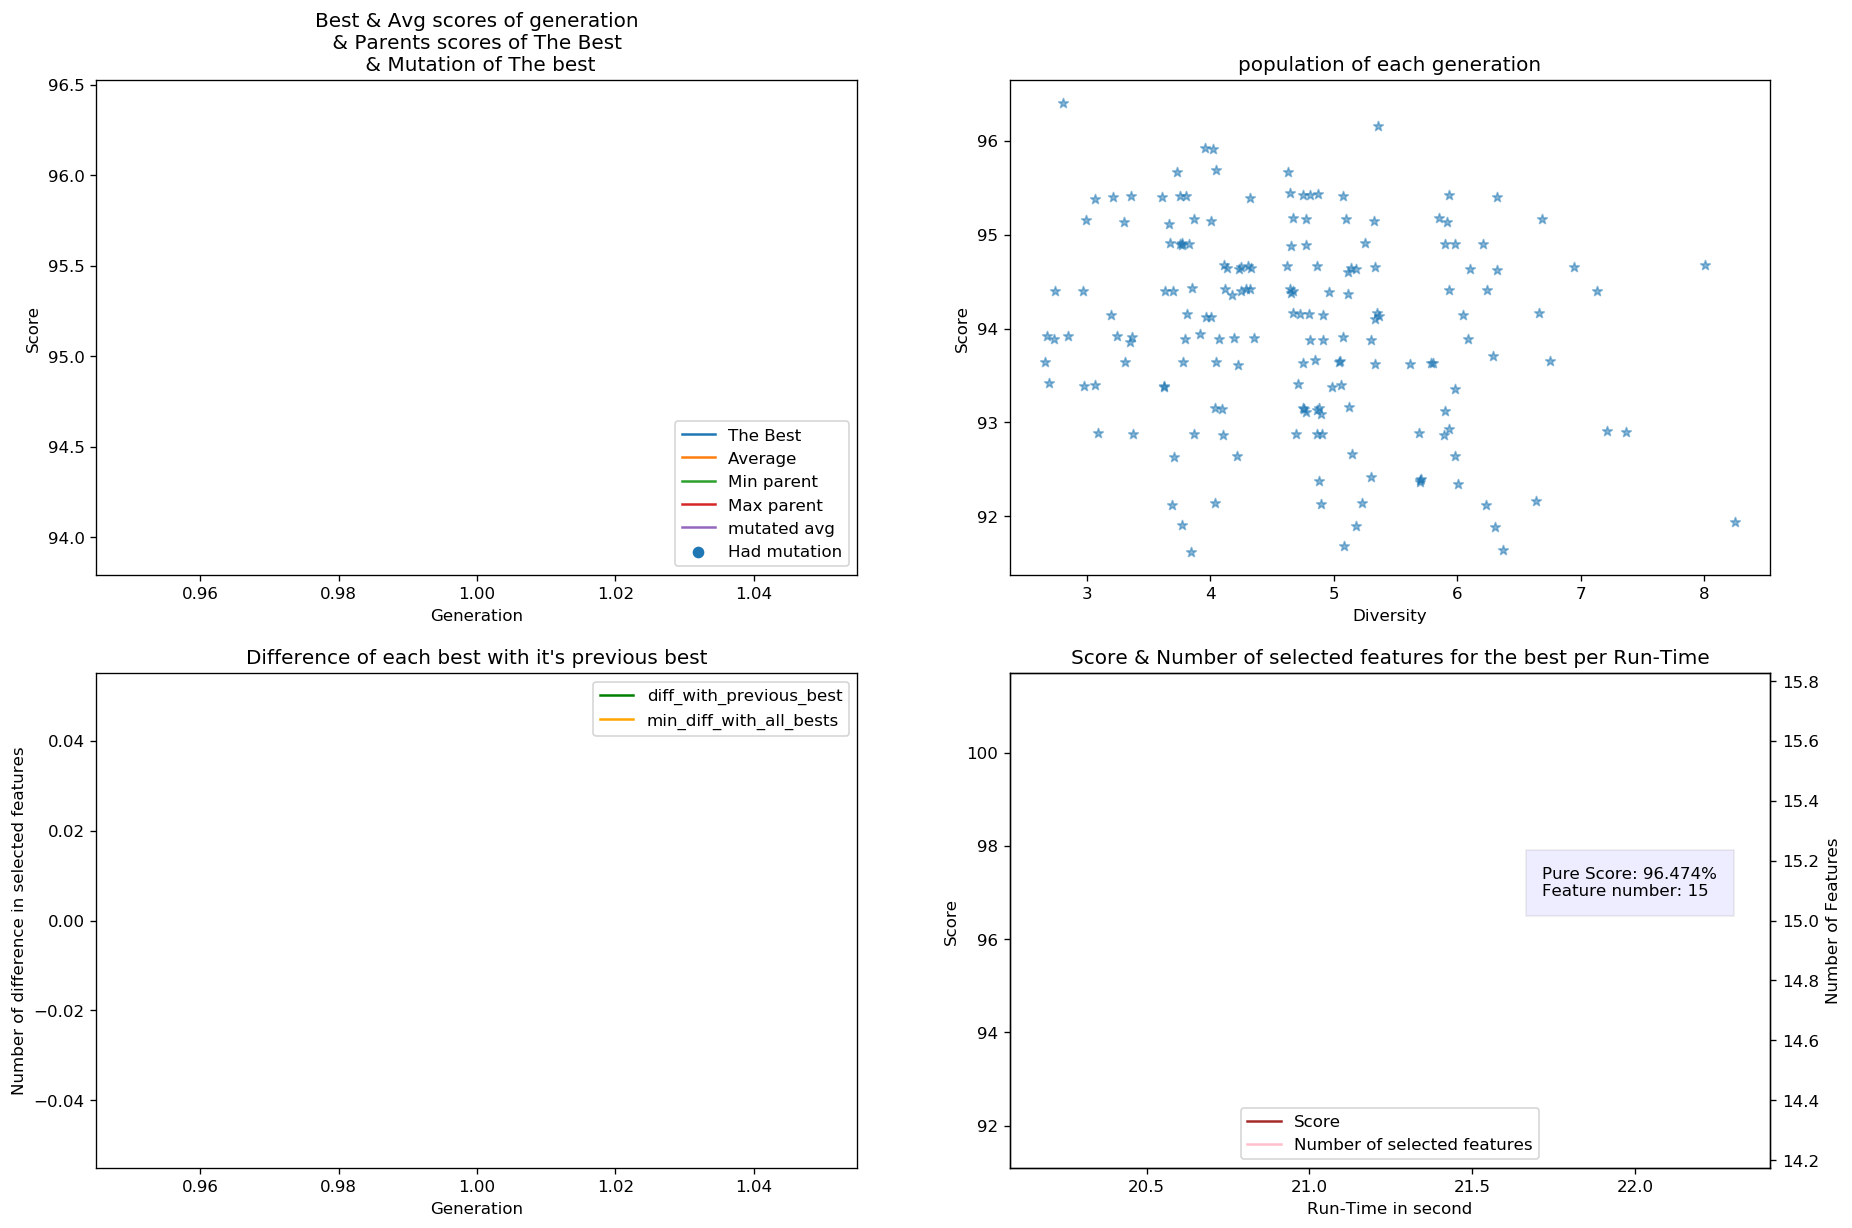

KeyboardInterrupt: 

In [4]:
importlib.reload(gafs)
sel = gafs.GeneticSelector(estimator= clf_rf,#SVC(kernel='linear', C=0.00005), 
                        n_gen=10, 
                        n_best=5, # small number will not coverge, big number respect to n_rand will stick in local optimum
                        n_rand=10, # small number stick in local optimum,   big number has time cost
                        n_children=4, # big number stick in local optimum,    small number will not converge
                        n_die=5,
                        prc_features_rand_init=.5,
                        initial_size_ratio=10,
                        initial_rate_search_score=3,
                        mutation_rate=0.2,
                        scoring='accuracy',
                        mutate_rate_micro=2/30,# suggest to be 2 feature = (2/number_of_features)
                        l1=0.005,
                        previous_result=None,
                        n_jobs=-1,
                        max_iterate=20,                    
                        f_diverse=True,                    
                        f_periority_in_crossover=False,     
                        f_extra_best_previous=False,        
                        f_extra_bests_previous=False,      
                        f_extra_mutate=False,              
                        f_extra_crossover_with_minimal=False,
                        f_rfecv=True,
                        f_dynamic_child=True)
sel.fit(x_train, y_train)                     

In [83]:
X.columns[sel.support_]

Index(['texture_mean', 'smoothness_mean', 'concave points_mean',
       'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst'],
      dtype='object')

In [84]:
clf_rf.fit(x_train.loc[:,x_train.columns[sel.support_]],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

In [85]:
from sklearn.metrics import accuracy_score


In [86]:
accuracy_score(y_test,clf_rf.predict(x_test.loc[:,x_train.columns[sel.support_]]))

0.9707602339181286